In [136]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import RandomizedSearchCV
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from collections import defaultdict



In [137]:
data1 = pd.read_csv("train.csv")
data1.head(1)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23


In [138]:
data1.columns = ["ItemID","X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
 "EstablishmentYear", "Size", "Location_Type", "Outlet_Type","Y"]


In [139]:
data1.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [140]:
X = data1.drop("Y", axis=1)
Y = data1["Y"]

In [141]:
def transform_target(Y):
    return np.sqrt(np.exp(Y))

def inverse_transform_target(Y_transformed):
    return np.log(Y_transformed**2)

In [142]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

In [143]:
#get unique values of each categorical column
for col in categorical_features:
    print(f"Column: {col}")
    print(X[col].unique())

Column: ItemID
['FDA15' 'DRC01' 'FDN15' ... 'NCX17' 'FDH31' 'FDX13']
Column: FatContent
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Column: Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Column: OutletID
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Column: Size
['Medium' nan 'High' 'Small']
Column: Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Column: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [144]:
#from ydata_profiling import ProfileReport

# Generate a profile report for data1
#profile = ProfileReport(data1, title="Data1 Profiling Report")

# To display the report in the Jupyter Notebook
#profile.to_notebook_iframe()

# Pipeline transformation

In [145]:
#visibility a lot of zeros

In [146]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                 1711
Location_Type           0
Outlet_Type             0
dtype: int64

In [147]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [148]:
X.dtypes

ItemID                object
X2                   float64
FatContent            object
Visibility           float64
Type                  object
MRP                  float64
OutletID              object
EstablishmentYear      int64
Size                  object
Location_Type         object
Outlet_Type           object
dtype: object

In [149]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


this is just an initial pipeline for experementation, so KNN imputer would perform poorly as there are many unecessary features that will be removed later so we go by mode and change it to KNN at the end

In [150]:
X['Category'] = X['ItemID'].str[:2]

In [151]:

class TypeMeanPriceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, smoothing=1):
        self.smoothing = smoothing
        self.category_mean_price = None

    def fit(self, X, y=None):
        if y is None:
            raise ValueError("Target variable `y` cannot be None in the fit method.")
        data_ = X.copy()
        data_['Y'] = y
        # Calculate the mean price for each OutletID and Type
        mean_price = data_.groupby(['OutletID', 'Type'])['Y'].mean()
        count = data_.groupby(['OutletID', 'Type'])['Y'].count()
        global_mean = data_['Y'].mean()
        
        # Apply smoothing
        self.category_mean_price = ((mean_price * count) + (global_mean * self.smoothing)) / (count + self.smoothing)
        self.category_mean_price = self.category_mean_price.reset_index()
        self.category_mean_price.columns = ['OutletID', 'Type', 'TypeMeanPrice']
        return self

    def transform(self, X):
        X = X.copy()
        # Merge the mean price with the original dataframe
        X = pd.merge(X, self.category_mean_price, on=['OutletID', 'Type'], how='left')
        X['TypeMeanPrice'] = np.log1p(X['TypeMeanPrice'])
        return X[['TypeMeanPrice']]


In [152]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [153]:
class VisibilityZerosImputerZerosImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_Visibility_mean = defaultdict(lambda: None)  # Stores mean of Visibility per ItemID
        self.global_mean = None  # Fallback global mean for Visibility

    def fit(self, X, y=None):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mean Visibility for each ItemID
        item_Visibility_mean = X.groupby('ItemID')['Visibility'].mean()
        self.item_Visibility_mean.update(item_Visibility_mean.to_dict())

        # Calculate global mean for the Visibility column
        if X['Visibility'].notnull().any():
            self.global_mean = X['Visibility'].mean()
        else:
            raise ValueError("Visibility column contains only NaN values.")

        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'Visibility' not in X.columns:
            raise ValueError("Both 'ItemID' and 'Visibility' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute zero Visibilitys based on ItemID or global mean
        X['Visibility'] = X.apply(
            lambda row: self.item_Visibility_mean.get(row['ItemID'], self.global_mean)
            if row['Visibility'] == 0
            else row['Visibility'],
            axis=1
        )

        X['Visibility'] = X['Visibility'].replace(0, self.global_mean)
        X['Visibility'] = np.sqrt(X['Visibility'])

        return X[['Visibility']]


In [154]:
# Get the value counts of the 'ItemID' column
item_counts = X["ItemID"].value_counts()

# Filter the 'ItemID' values that appear more than once
items_with_multiple_entries = item_counts[item_counts > 1].index
print(items_with_multiple_entries.shape[0])
print(X['ItemID'].nunique())



1472
1553


so the imputer in effective in most cases

In [155]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [156]:
print(X['FatContent'].value_counts())
print(X['Location_Type'].value_counts())
print(X['Outlet_Type'].value_counts())
print(X['Size'].value_counts())

FatContent
Low Fat    3595
Regular    2030
LF          220
reg          81
low fat      74
Name: count, dtype: int64
Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Outlet_Type
Supermarket Type1    3967
Grocery Store         737
Supermarket Type3     659
Supermarket Type2     637
Name: count, dtype: int64
Size
Medium    1935
Small     1682
High       672
Name: count, dtype: int64


In [157]:
X["FatContent"] = X["FatContent"].replace({"low fat": "LF", "Low Fat": "LF", "Regular": "REG", "reg": "REG"})
X.loc[X['Category'] == 'NC', 'FatContent'] = 'nofat'


In [158]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [159]:
class X2NaNsImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.item_X2_mode = defaultdict(lambda: None)  # Stores mode of X2 per ItemID
        self.global_mean = None  # Fallback global mean for X2

    def fit(self, X, y=None):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Calculate mode X2 for each ItemID
        item_X2_mode = X.groupby('ItemID')['X2'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        self.item_X2_mode.update(item_X2_mode.to_dict())

        # Calculate global mean for the X2 column
        if X['X2'].notnull().any():
            self.global_mean = X['X2'].mean()
        else:
            raise ValueError("X2 column contains only NaN values.")

        return self

    def transform(self, X):
        X = X.copy()

        # Ensure the required columns exist
        if 'ItemID' not in X.columns or 'X2' not in X.columns:
            raise ValueError("Both 'ItemID' and 'X2' columns must be present in the dataset.")

        # Ensure no None values in ItemID
        if X['ItemID'].isnull().any():
            raise ValueError("ItemID column contains None values.")

        # Safely impute NaN X2s based on ItemID or global mean
        X['X2'] = X.apply(
            lambda row: self.item_X2_mode.get(row['ItemID'], self.global_mean)
            if pd.isnull(row['X2'])
            else row['X2'],
            axis=1
        )

        X['X2'] = X['X2'].fillna(self.global_mean)

        return X[['X2']]

In [160]:


class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
        self.scaler_price_per_unit_weight = StandardScaler()
        self.scaler_X2 = StandardScaler()
        self.scaler_pricing_strategy = StandardScaler()

    def fit(self, X, y=None):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)
        # Create new features
        X['price_per_unit_weight'] = X['TypeMeanPrice_0'] / (X['X2'] + 0.0001)
        X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        
        # Fit the scalers on the training data
        self.scaler_price_per_unit_weight.fit(X[['price_per_unit_weight']])
        self.scaler_X2.fit(X[['X2']])
        self.scaler_pricing_strategy.fit(X[['pricing_strategy']])
        
        return self

    def transform(self, X):
        # Convert to DataFrame with updated column names
        X = pd.DataFrame(X, columns=self.column_names)

        # Create new features
        X['BigMac_index2'] = (X['Visibility'] + 0.0001) * (X['Outlet_TypeOrdinal'] + 1) * (X['TypeMeanPrice_0'] + 3.24995) * (X['Location_Type'] + 1)
        X['price_per_unit_weight'] = X['TypeMeanPrice_0'] / (X['X2'] + 0.0001)
        X['BigMac_index2'] = np.sqrt(X['BigMac_index2'])
        X['pricing_strategy'] = X['MRP'] - (X['TypeMeanPrice_0'] * (X['Outlet_TypeOrdinal'] + 1) * (X['Location_Type'] + 1))
        X['RegionalPotential'] = X['Location_Type'] * (X['PastYearsCont'] + 1)

        # Standard scale the new features
        X['price_per_unit_weight'] = self.scaler_price_per_unit_weight.transform(X[['price_per_unit_weight']])
        X['X2'] = self.scaler_X2.transform(X[['X2']])
        X['pricing_strategy'] = self.scaler_pricing_strategy.transform(X[['pricing_strategy']])

        # Drop unwanted columns
        drop_columns = [
            "Category_DR", "Category_FD", "Outlet_Type_Supermarket Type2",'FatContent',
            "Outlet_Type_Supermarket Type1", "BigMac_index3",'Size',
            "Visibility", "BigMac_index", "Outlet_Type_Grocery Store", "Outlet_Type_Supermarket Type3"
        ]
        X.drop(columns=[col for col in drop_columns if col in X.columns], inplace=True)

        return X



In [161]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import pandas as pd

class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters=5, random_state=42):
        self.num_clusters = num_clusters
        self.random_state = random_state
        

    def fit(self, X, y=None):
        #X = X.drop("price_per_unit_weight", axis=1)
        # Fit KMeans using the original features
        self.feature_names_in_ = X.columns  # Store original column names
        self.kmeans = KMeans(n_clusters=self.num_clusters, random_state=self.random_state)
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        #X = X.drop("price_per_unit_weight", axis=1)
        # Ensure the input columns match those seen during fit
        if list(X.columns) != list(self.feature_names_in_):
            raise ValueError(
                "The feature names should match those that were passed during fit.\n"
                f"Feature names unseen at fit time: {set(X.columns) - set(self.feature_names_in_)}\n"
                f"Feature names seen at fit time but not in transform: {set(self.feature_names_in_) - set(X.columns)}"
            )
        
        # Compute cluster labels
        cluster_labels = self.kmeans.predict(X)

        # Compute distances to centroids
        centroid_distances = self.kmeans.transform(X)

        # Create a new DataFrame with cluster labels and centroid distances
        new_features = pd.DataFrame(
            centroid_distances, 
            columns=[f"Centroid_{i}" for i in range(centroid_distances.shape[1])],
            index=X.index
        )
        new_features['Cluster'] = cluster_labels

        # Concatenate the original DataFrame with the new features
        X_transformed = pd.concat([X.reset_index(drop=True), new_features.reset_index(drop=True)], axis=1)
        return X_transformed



In [162]:
X['Size'].fillna('Small', inplace=True)

C:\Users\shels\AppData\Local\Temp\ipykernel_6248\1989471734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Size'].fillna('Small', inplace=True)


In [163]:
X.isnull().sum()

ItemID                  0
X2                   1006
FatContent              0
Visibility              0
Type                    0
MRP                     0
OutletID                0
EstablishmentYear       0
Size                    0
Location_Type           0
Outlet_Type             0
Category                0
dtype: int64

In [164]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [165]:
X['Visibility'] = np.sqrt(X['Visibility'])

In [166]:
X['FatContent'].value_counts()

FatContent
LF       2787
REG      2111
nofat    1102
Name: count, dtype: int64

In [167]:
print(X['Location_Type'].value_counts())
print(X['Size'].value_counts())
print(X['Category'].value_counts())

Location_Type
Tier 3    2358
Tier 2    1992
Tier 1    1650
Name: count, dtype: int64
Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64
Category
FD    4335
NC    1102
DR     563
Name: count, dtype: int64


In [168]:
X['Size'].isnull().sum()

0

In [169]:
X.Size.value_counts()

Size
Small     3393
Medium    1935
High       672
Name: count, dtype: int64

In [170]:
X.columns

Index(['ItemID', 'X2', 'FatContent', 'Visibility', 'Type', 'MRP', 'OutletID',
       'EstablishmentYear', 'Size', 'Location_Type', 'Outlet_Type',
       'Category'],
      dtype='object')

In [171]:
X['MRP_cluster']=pd.cut(X['MRP'],bins=[25,69,137,203,270],labels=['very low','low','high','very high'],right=True)

In [172]:
X['OutletID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [173]:
all_features = ['EstablishmentYear', 'MRP',"Outlet_Type",'MRP_cluster','Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned','X2','Visibility']
target_encoder_cols = ['Type']
numerical_cols = ['EstablishmentYear', 'MRP']
VisibilityZeros_cols = ['ItemID','Visibility']
X2_imputer_cols = ['X2','ItemID']
ordinal_cols = [ "Outlet_Type",'MRP_cluster']
TypeMeanPriceTransformer_col = ['OutletID' ,'Type']
one_hot_columns = ['Type']  # only one-hot encoding
ordinal_categories = [  # FatContent 
    ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
    ['very low','low','high','very high'] 
    
   # Size
]

# Define numerical pipeline
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent"))
    #,("scaler", StandardScaler())
])

# size_imputer_pipeline = Pipeline([
#     ("custom_size_imputer", SizeImputer()),
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("ordinal", OrdinalEncoder(categories=[['Small', 'Medium', 'High']]))
# ])

type_mean_price_pipeline = Pipeline([
    ("type_mean_price_transformer", TypeMeanPriceTransformer(smoothing=0.5)),
    ("imputer", SimpleImputer(strategy="mean"))
])

# Define one-hot encoding pipeline
ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Define one-hot encoding pipeline for onehot-transform columns
onehot_transform_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(categories=[['Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned']], handle_unknown="ignore"))
])
# Define target encoding pipeline
target_encoding_pipeline = Pipeline([
    ("target_encoder", TargetEncoder(cols=target_encoder_cols , smoothing=0.5) )
])

# Combine all pipelines into a ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
   # ("type_mean_price", type_mean_price_pipeline, TypeMeanPriceTransformer_col),
    #("target_encoder", target_encoding_pipeline, target_encoder_cols),
    ("ordinal", ordinal_pipeline, ordinal_cols),
    ("onehot_", onehot_transform_pipeline, one_hot_columns),
    ("X2_imputer", X2NaNsImputer(), X2_imputer_cols),
    ("VisibilityZeros", VisibilityZerosImputerZerosImputer(), VisibilityZeros_cols)
])

# Define the final pipeline
# Create the extended pipeline
final_pipeline = Pipeline([
    ("preprocessor", preprocessor)
    #("custom_features", CustomFeatureTransformer(column_names=all_features )),
    #("kmeans", KMeansTransformer(num_clusters=5, random_state=42))
])


    

# Fit and transform the data


# Get the feature names after transformation




In [174]:
X_trans = preprocessor.fit_transform(X, Y)
X_trans = pd.DataFrame(X_trans, columns=all_features)

In [175]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,Snack Foods,Frozen Foods,Fruits and Vegetables,Canned,X2,Visibility
0,1999.0,249.8092,1.0,3.0,0.0,0.0,0.0,0.0,9.30,0.355918
1,2009.0,48.2692,2.0,0.0,0.0,0.0,0.0,0.0,5.92,0.372620
2,1999.0,141.6180,1.0,2.0,0.0,0.0,0.0,0.0,17.50,0.359806
3,1998.0,182.0950,0.0,2.0,0.0,0.0,1.0,0.0,19.20,0.301472
4,1987.0,53.8614,1.0,0.0,0.0,0.0,0.0,0.0,8.93,0.251148


In [176]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,Snack Foods,Frozen Foods,Fruits and Vegetables,Canned,X2,Visibility
0,1999.0,249.8092,1.0,3.0,0.0,0.0,0.0,0.0,9.30,0.355918
1,2009.0,48.2692,2.0,0.0,0.0,0.0,0.0,0.0,5.92,0.372620
2,1999.0,141.6180,1.0,2.0,0.0,0.0,0.0,0.0,17.50,0.359806
3,1998.0,182.0950,0.0,2.0,0.0,0.0,1.0,0.0,19.20,0.301472
4,1987.0,53.8614,1.0,0.0,0.0,0.0,0.0,0.0,8.93,0.251148


In [177]:
X.head()

,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type,Category,MRP_cluster
0,FDA15,9.30,LF,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,very high
1,DRC01,5.92,REG,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,DR,very low
2,FDN15,17.50,LF,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,FD,high
3,FDX07,19.20,REG,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,FD,high
4,NCD19,8.93,nofat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,NC,very low


In [178]:
X_trans.dtypes

EstablishmentYear        float64
MRP                      float64
Outlet_Type              float64
MRP_cluster              float64
Snack Foods              float64
Frozen Foods             float64
Fruits and Vegetables    float64
Canned                   float64
X2                       float64
Visibility               float64
dtype: object

In [179]:
categorical_columns = ['OutletID']
for col in categorical_columns:
    X_trans[col] = X[col].astype('category')


In [180]:
X_trans.EstablishmentYear = X_trans.EstablishmentYear.astype('category')
X_trans.MRP_cluster = X_trans.MRP_cluster.astype('category')
X_trans['outlier'] = (X_trans['Snack Foods'] + X_trans['Frozen Foods'] + X_trans['Fruits and Vegetables'] + X_trans['Canned']) * ( X_trans['X2'] + X_trans['Visibility'])
X_trans.drop(['Snack Foods', 'Frozen Foods', 'Fruits and Vegetables', 'Canned' , 'X2','Visibility'], axis=1, inplace=True)

In [181]:
X_trans.head(20)

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,outlier
0,1999.0,249.8092,1.0,3.0,OUT049,0.000000
1,2009.0,48.2692,2.0,0.0,OUT018,0.000000
2,1999.0,141.6180,1.0,2.0,OUT049,0.000000
3,1998.0,182.0950,0.0,2.0,OUT010,19.501472
4,1987.0,53.8614,1.0,0.0,OUT013,0.000000
5,2009.0,51.4008,2.0,0.0,OUT018,0.000000
6,1987.0,57.6588,1.0,0.0,OUT013,13.985971
7,1985.0,107.7622,3.0,1.0,OUT027,19.597519
8,2002.0,96.9726,1.0,1.0,OUT045,16.559414
9,2007.0,187.8214,1.0,2.0,OUT017,19.754370


In [182]:
X_trans

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,outlier
0,1999.0,249.8092,1.0,3.0,OUT049,0.000000
1,2009.0,48.2692,2.0,0.0,OUT018,0.000000
2,1999.0,141.6180,1.0,2.0,OUT049,0.000000
3,1998.0,182.0950,0.0,2.0,OUT010,19.501472
4,1987.0,53.8614,1.0,0.0,OUT013,0.000000
...,...,...,...,...,...,...
5995,2007.0,94.7778,1.0,1.0,OUT017,20.991888
5996,1999.0,58.6246,1.0,0.0,OUT049,9.777418
5997,2002.0,60.4536,1.0,0.0,OUT045,11.185555
5998,2004.0,195.8452,1.0,2.0,OUT035,0.000000


In [183]:
X_trans.describe()

,MRP,Outlet_Type,outlier
count,6000.000000,6000.000000,6000.000000
mean,141.228200,1.203000,6.288350
std,62.540569,0.791978,7.430682
min,31.290000,0.000000,0.000000
25%,94.037650,1.000000,0.000000
50%,143.197000,1.000000,0.000000
75%,186.522050,1.000000,13.057905
max,266.888400,3.000000,21.957407


In [184]:
X['Visibility'].isnull().sum()  

0

In [185]:
X_trans.columns

Index(['EstablishmentYear', 'MRP', 'Outlet_Type', 'MRP_cluster', 'OutletID',
       'outlier'],
      dtype='object')

In [186]:
X_trans.dtypes

EstablishmentYear    category
MRP                   float64
Outlet_Type           float64
MRP_cluster          category
OutletID             category
outlier               float64
dtype: object

array([[<Axes: title={'center': 'MRP'}>,
        <Axes: title={'center': 'Outlet_Type'}>],
       [<Axes: title={'center': 'outlier'}>, <Axes: >]], dtype=object)

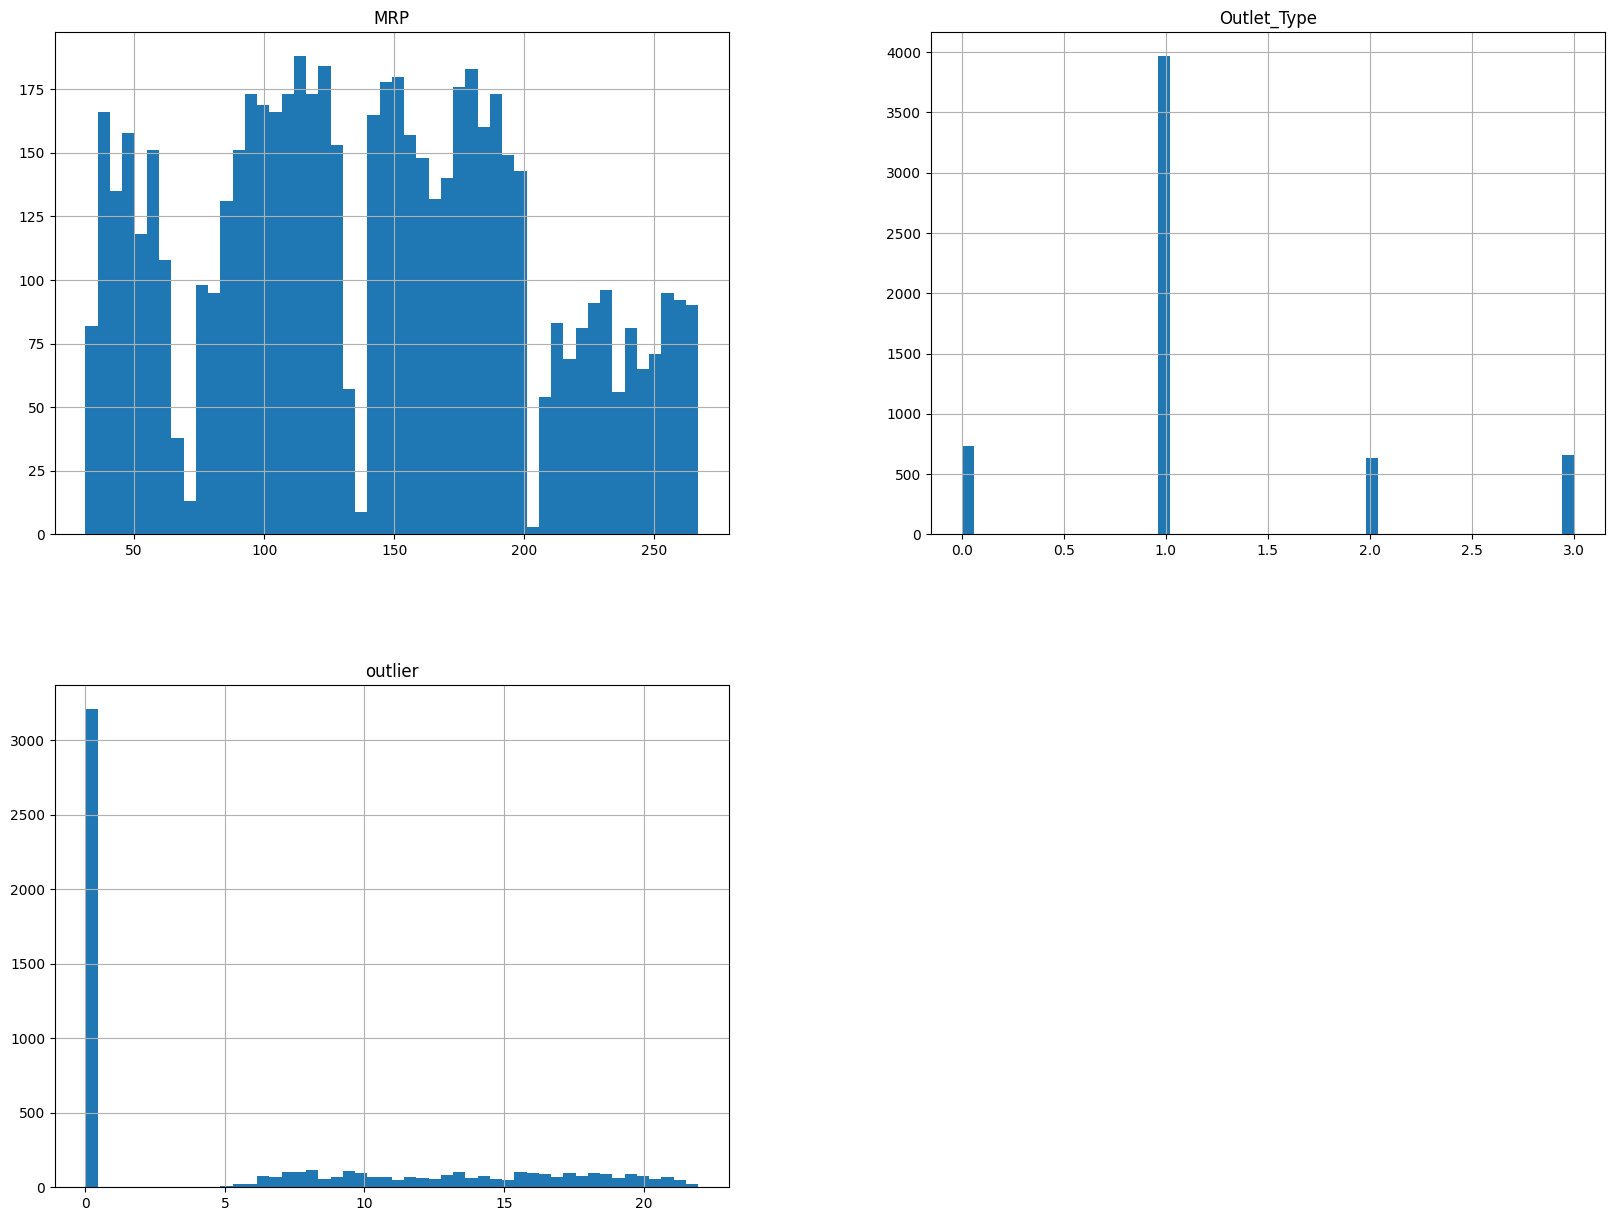

In [187]:
X_trans.hist(bins=50, figsize=(20,15))

In [188]:
# XGBoost Best Parameters: {'n_estimators': 669, 'learning_rate': 0.06035467909986324, 'max_depth': 6, 'subsample': 0.923204157140139, 'colsample_bytree': 0.4883434932394659, 'reg_alpha': 5.410450954065299, 'reg_lambda': 1.1186894717633518, 'min_child_weight': 5, 'gamma': 2.3596898720558754, 'max_bin': 300}
# XGBoost Best MAE: 0.4007986806933085  emafrood di tegib 0.372


In [189]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,outlier
0,1999.0,249.8092,1.0,3.0,OUT049,0.000000
1,2009.0,48.2692,2.0,0.0,OUT018,0.000000
2,1999.0,141.6180,1.0,2.0,OUT049,0.000000
3,1998.0,182.0950,0.0,2.0,OUT010,19.501472
4,1987.0,53.8614,1.0,0.0,OUT013,0.000000


In [190]:
import optuna
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'max_bin': trial.suggest_int('max_bin', 128, 512),
        'objective': 'reg:absoluteerror',
        'eval_metric': 'mae',
        'random_state': 42,
        'enable_categorical': True
    }

    model = XGBRegressor(**param)
    scores = cross_val_score(model, X_trans, Y, cv=5, scoring='neg_mean_absolute_error')
    mae = -scores.mean()
    return mae

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=70)

print("XGBoost Best Parameters:", study_xgb.best_params)
print("XGBoost Best MAE:", study_xgb.best_value)



[I 2024-12-28 00:53:49,141] A new study created in memory with name: no-name-f339f4c6-5307-46eb-bd8a-487e293012e7
[W 2024-12-28 00:53:52,606] Trial 0 failed with parameters: {'n_estimators': 658, 'learning_rate': 0.24666889557069088, 'max_depth': 11, 'subsample': 0.9369075326791222, 'colsample_bytree': 0.7746909545963045, 'reg_alpha': 0.5114886534704388, 'reg_lambda': 0.3147597281619796, 'min_child_weight': 5, 'gamma': 3.0792479628147644, 'max_bin': 340} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\shels\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\shels\AppData\Local\Temp\ipykernel_6248\3582423933.py", line 26, in objective_xgb
    scores = cross_val_score(model, X_trans, Y, cv=5, scoring='neg_mean_absolute_error')
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

KeyboardInterrupt: 

In [191]:
# Import the test.csv file
test_data = pd.read_csv("test.csv")

# Add column names
test_data.columns = ["ItemID", "X2", "FatContent", "Visibility", "Type", "MRP", "OutletID",
                     "EstablishmentYear", "Size", "Location_Type", "Outlet_Type"]
test_data.head()


,ItemID,X2,FatContent,Visibility,Type,MRP,OutletID,EstablishmentYear,Size,Location_Type,Outlet_Type
0,FDO37,NaN,Low Fat,0.021273,Breakfast,229.1326,OUT027,1985,Medium,Tier 3,Supermarket Type3
1,FDV13,17.35,Regular,0.027588,Canned,86.1856,OUT013,1987,High,Tier 3,Supermarket Type1
2,FDF52,9.30,Low Fat,0.111782,Frozen Foods,182.3292,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDY11,6.71,Regular,0.029606,Baking Goods,65.4142,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,FDL20,17.10,Low Fat,0.129141,Fruits and Vegetables,109.4886,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [192]:
                    # Create the 'MRP_cluster' column in the test_data DataFrame
test_data['MRP_cluster'] = pd.cut(test_data['MRP'].astype(float), bins=[25, 69, 137, 203, 270], labels=['very low', 'low', 'high', 'very high'], right=True)
# Display the first few rows of the DataFrame
test_data_trans = preprocessor.transform(test_data)
test_data_trans = pd.DataFrame(test_data_trans, columns=all_features)

In [193]:
test_data_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,Snack Foods,Frozen Foods,Fruits and Vegetables,Canned,X2,Visibility
0,1985.0,229.1326,3.0,3.0,0.0,0.0,0.0,0.0,8.06,0.145853
1,1987.0,86.1856,1.0,1.0,0.0,0.0,0.0,1.0,17.35,0.166096
2,1998.0,182.3292,0.0,2.0,0.0,1.0,0.0,0.0,9.30,0.334337
3,1999.0,65.4142,1.0,0.0,0.0,0.0,0.0,0.0,6.71,0.172065
4,2007.0,109.4886,1.0,1.0,0.0,0.0,1.0,0.0,17.10,0.359362


In [195]:

categorical_columns = ['OutletID']
for col in categorical_columns:
    test_data_trans[col] = test_data[col].astype('category')
test_data_trans.EstablishmentYear = test_data_trans.EstablishmentYear.astype('category')
test_data_trans.MRP_cluster = test_data_trans.MRP_cluster.astype('category')
test_data_trans['outlier'] = (test_data_trans['Snack Foods'] + test_data_trans['Frozen Foods'] + test_data_trans['Fruits and Vegetables'] + test_data_trans['Canned']) * ( test_data_trans['X2'] + test_data_trans['Visibility'])
test_data_trans.drop(['Frozen Foods', 'Fruits and Vegetables', 'X2', 'Canned', 'Visibility', 'Snack Foods'], axis=1, inplace=True)
test_data_trans.head()


,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,outlier
0,1985.0,229.1326,3.0,3.0,OUT027,0.000000
1,1987.0,86.1856,1.0,1.0,OUT013,17.516096
2,1998.0,182.3292,0.0,2.0,OUT010,9.634337
3,1999.0,65.4142,1.0,0.0,OUT049,0.000000
4,2007.0,109.4886,1.0,1.0,OUT017,17.459362


In [196]:
# Update the XGBRegressor model with the best parameters from the Optuna study
#not correct params correct is with 670 estimators
best_xgb_params = {
    'n_estimators': 669,
    'learning_rate': 0.06035467909986324,
    'max_depth': 6,
    'subsample': 0.923204157140139,
    'colsample_bytree': 0.4883434932394659,
    'reg_alpha': 5.410450954065299,
    'reg_lambda': 1.1186894717633518,
    'min_child_weight': 5,
    'gamma': 2.3596898720558754,
    'max_bin': 300,
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'random_state': 42,
    'enable_categorical': True
}
# Create the XGBRegressor model with the best parameters
best_xgb_model = XGBRegressor(**best_xgb_params)

# Create the pipeline with the final preprocessor and the best XGBRegressor model
# Fit the pipeline to the training data
best_xgb_model.fit(X_trans, Y)
# # Display the updated pipeline


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4883434932394659, device=None,
             early_stopping_rounds=None, enable_categorical=True,
             eval_metric='mae', feature_types=None, gamma=2.3596898720558754,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06035467909986324,
             max_bin=300, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=669, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [481]:
# Update the XGBRegressor model with the best parameters from the Optuna study
# best_xgb_params = study_xgb.best_params
# best_xgb_params['objective'] = 'reg:squarederror'
# best_xgb_params['eval_metric'] = 'mae'
# # Create the XGBRegressor model with the best parameters
# best_xgb_model = XGBRegressor(**best_xgb_params)

# # Update the pipeline with the best XGBRegressor model
# pipeline.set_params(xgb=best_xgb_model)

# # Fit the pipeline to the training data
# pipeline.fit(X, Y)

# # Display the updated pipeline
# print(pipeline)

In [198]:
predictions = best_xgb_model.predict(test_data_trans)
# Create a DataFrame with row_id and predictions
output_df = pd.DataFrame({
    'row_id': test_data_trans.index,
    'Y': predictions
})
# Save the DataFrame to a CSV file
#output_df.to_csv('elha2ounaaa.csv', index=False)

In [199]:
X_trans.head()

,EstablishmentYear,MRP,Outlet_Type,MRP_cluster,OutletID,outlier
0,1999.0,249.8092,1.0,3.0,OUT049,0.000000
1,2009.0,48.2692,2.0,0.0,OUT018,0.000000
2,1999.0,141.6180,1.0,2.0,OUT049,0.000000
3,1998.0,182.0950,0.0,2.0,OUT010,19.501472
4,1987.0,53.8614,1.0,0.0,OUT013,0.000000


In [487]:
X_trans.dtypes

EstablishmentYear       category
MRP                      float64
Outlet_Type              float64
MRP_cluster             category
X2                       float64
Visibility               float64
OutletID                category
RareOutlierIndexSum      float64
Total                    float64
ValueCountPercentage     float64
dtype: object

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_trans, Y, test_size=0.2, random_state=42)
#X_train_catboost, X_test_catboost, Y_train_catboost, Y_test_catboost = train_test_split(X_trans_catboost, Y, test_size=0.2, random_state=42, stratify=X["Outlet_Type"])

In [201]:
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"Y_train type: {type(Y_train)}, shape: {Y_train.shape}")


X_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 6)
Y_train type: <class 'pandas.core.series.Series'>, shape: (4800,)


In [202]:
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
if isinstance(Y_train, pd.Series):
    Y_train = Y_train.to_frame()
if isinstance(Y_test, pd.Series):
    Y_test = Y_test.to_frame()
# if isinstance(Y_train_catboost, pd.Series):
#     Y_train_catboost = Y_train_catboost.to_frame()
# if isinstance(Y_test_catboost, pd.Series):
#     Y_test_catboost = Y_test_catboost.to_frame()


In [203]:
print(f"X_train type: {type(X_train)}, shape: {X_train.shape}")
print(f"Y_train type: {type(Y_train)}, shape: {Y_train.shape}")

X_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 6)
Y_train type: <class 'pandas.core.frame.DataFrame'>, shape: (4800, 1)


In [204]:
# transformed_array = final_pipeline.fit_transform(X_train, Y_train)

# # Dynamically generate feature names

# #all_features = numerical_features + ordinal_features + list(onehot_features) + target_encoder_features

# # Verify feature name and transformed array alignment

# # Create the transformed DataFrame
# X_transformed_train = pd.DataFrame(transformed_array, columns=all_features)
# X_transformed_train.head()


In [205]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    tick_labels_dict = {"tick_labels": X.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False, **tick_labels_dict)
    ax.axvline(x=0, color="k", linestyle="--")
# Assuming `pipeline` is already fitted

In [206]:
#X_transformed_test = final_pipeline.transform(X_test)

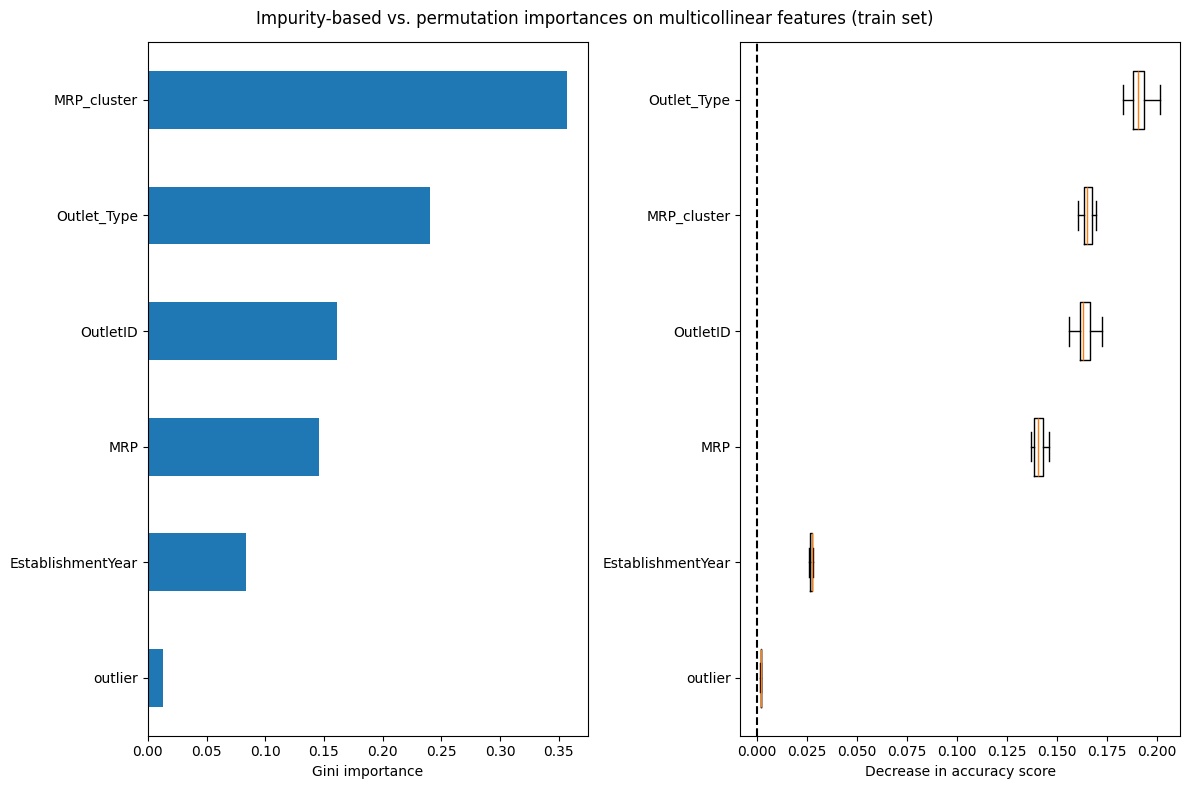

In [207]:
# Fit the pipeline
best_xgb_model.fit(X_train, Y_train)

# Calculate feature importances
mdi_importances = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(best_xgb_model.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance
plot_permutation_importance(best_xgb_model, X_train, Y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (train set)")
fig.tight_layout()
plt.show()

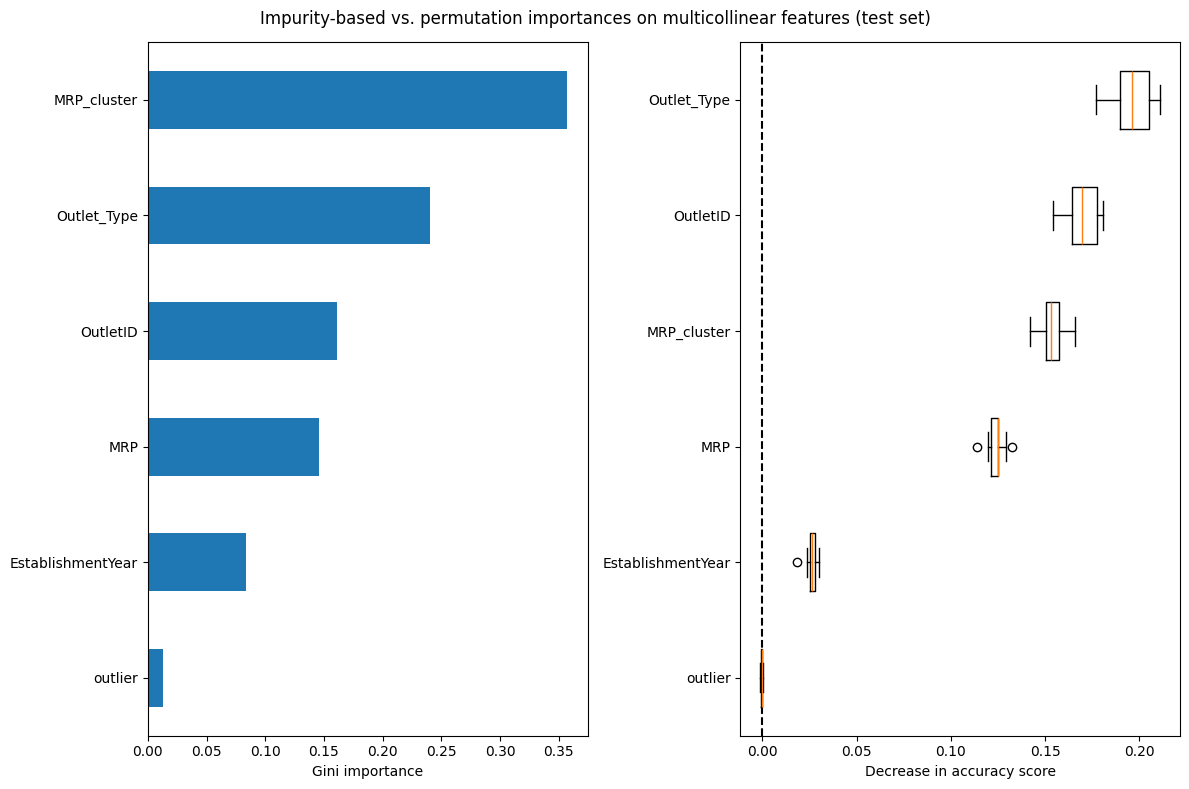

In [208]:
# Assuming X_transformed_test is already defined and transformed using the final pipeline
# Convert X_transformed_test to DataFrame
X_transformed_test_df = pd.DataFrame(X_test, columns=X_train.columns)

mdi_importances_test = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx_test = np.argsort(best_xgb_model.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot Gini importance for test data
mdi_importances_test.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")

# Plot permutation importance for test data
plot_permutation_importance(best_xgb_model, X_test, Y_test, ax2)
ax2.set_xlabel("Decrease in accuracy score")

fig.suptitle("Impurity-based vs. permutation importances on multicollinear features (test set)")
fig.tight_layout()
plt.show()